# 임베딩 방법 비교



## Data

자료는 한국전통지식포털에 실려 있는 전통의학처방 19171 건을 사용하였다. 

In [74]:
from collections import Counter
import numpy as np
import pandas as pd



In [58]:
corpus_path = "../../_data/formulas.txt"
corpus_ = open( corpus_path, 'r', encoding='utf-8' ).read()
header, corpus_raw = corpus_.split("***")
corpus_raw = corpus_raw.strip()
corpus = [ line.strip() for line in corpus_raw.split("\n") ]
corpus_list = [ line.split() for line in corpus ]

print( "# Corpus Description" )
print( header.strip() )
print()
print( "# Corpus Size: ", len(corpus) )


# Corpus Description
- 출처 : 한국전통지식포탈(www.koreantk.com) > 전통의료 > 처방
- 특징 : 본초 구성만 추출한 데이터
- 데이터 생성일 : 2016.01.16

# Corpus Size:  19162


## Data Overview

In [102]:
formula_size = [ len(formula) for formula in corpus_list ]
herb_with_count = Counter( sum( corpus_list, [] ) )
herb_count = list( herb_with_count.values() )

In [103]:
print( "# 처방 크기")
print( "* 가장 큰 처방의 크기:", max(formula_size) )
print( "* 가장 작은 처방의 크기:", min(formula_size) )
print( "* 처방 크기 평균:", np.mean(formula_size) )
print( "* 처방 크기 중간값:", np.median(formula_size) )
print() 
print( "# 본초 출현 빈도")
print( "* 가장 많은 출현 빈도:", max(herb_count) )
print( "* 가장 적은 출현 빈도:", min(herb_count) )
print( "* 출현 빈도 평균:", np.mean(herb_count) )
print( "* 출현 빈도 중간값:", np.median(herb_count) )

# 처방 크기
* 가장 큰 처방의 크기: 59
* 가장 작은 처방의 크기: 1
* 처방 크기 평균: 7.316459659743241
* 처방 크기 중간값: 6.0

# 본초 출현 빈도
* 가장 많은 출현 빈도: 7372
* 가장 적은 출현 빈도: 1
* 출현 빈도 평균: 76.11183496199783
* 출현 빈도 중간값: 6.0


In [82]:
topn = 20
herb_, freq_ = list( zip( *herb_with_count.most_common( topn ) ) )
print( "# 가장 많이 사용된 {}가지 본초".format(topn) )
pd.DataFrame( {"본초": herb_, "빈도": freq_ } )

# 가장 많이 사용된 20가지 본초


,본초,빈도
0,감초,7372
1,당귀,3834
2,인삼,3810
3,백출,3137
4,진피,2989
5,천궁,2701
6,반하,2340
7,황금,2052
8,백복령,1990
9,방풍,1943


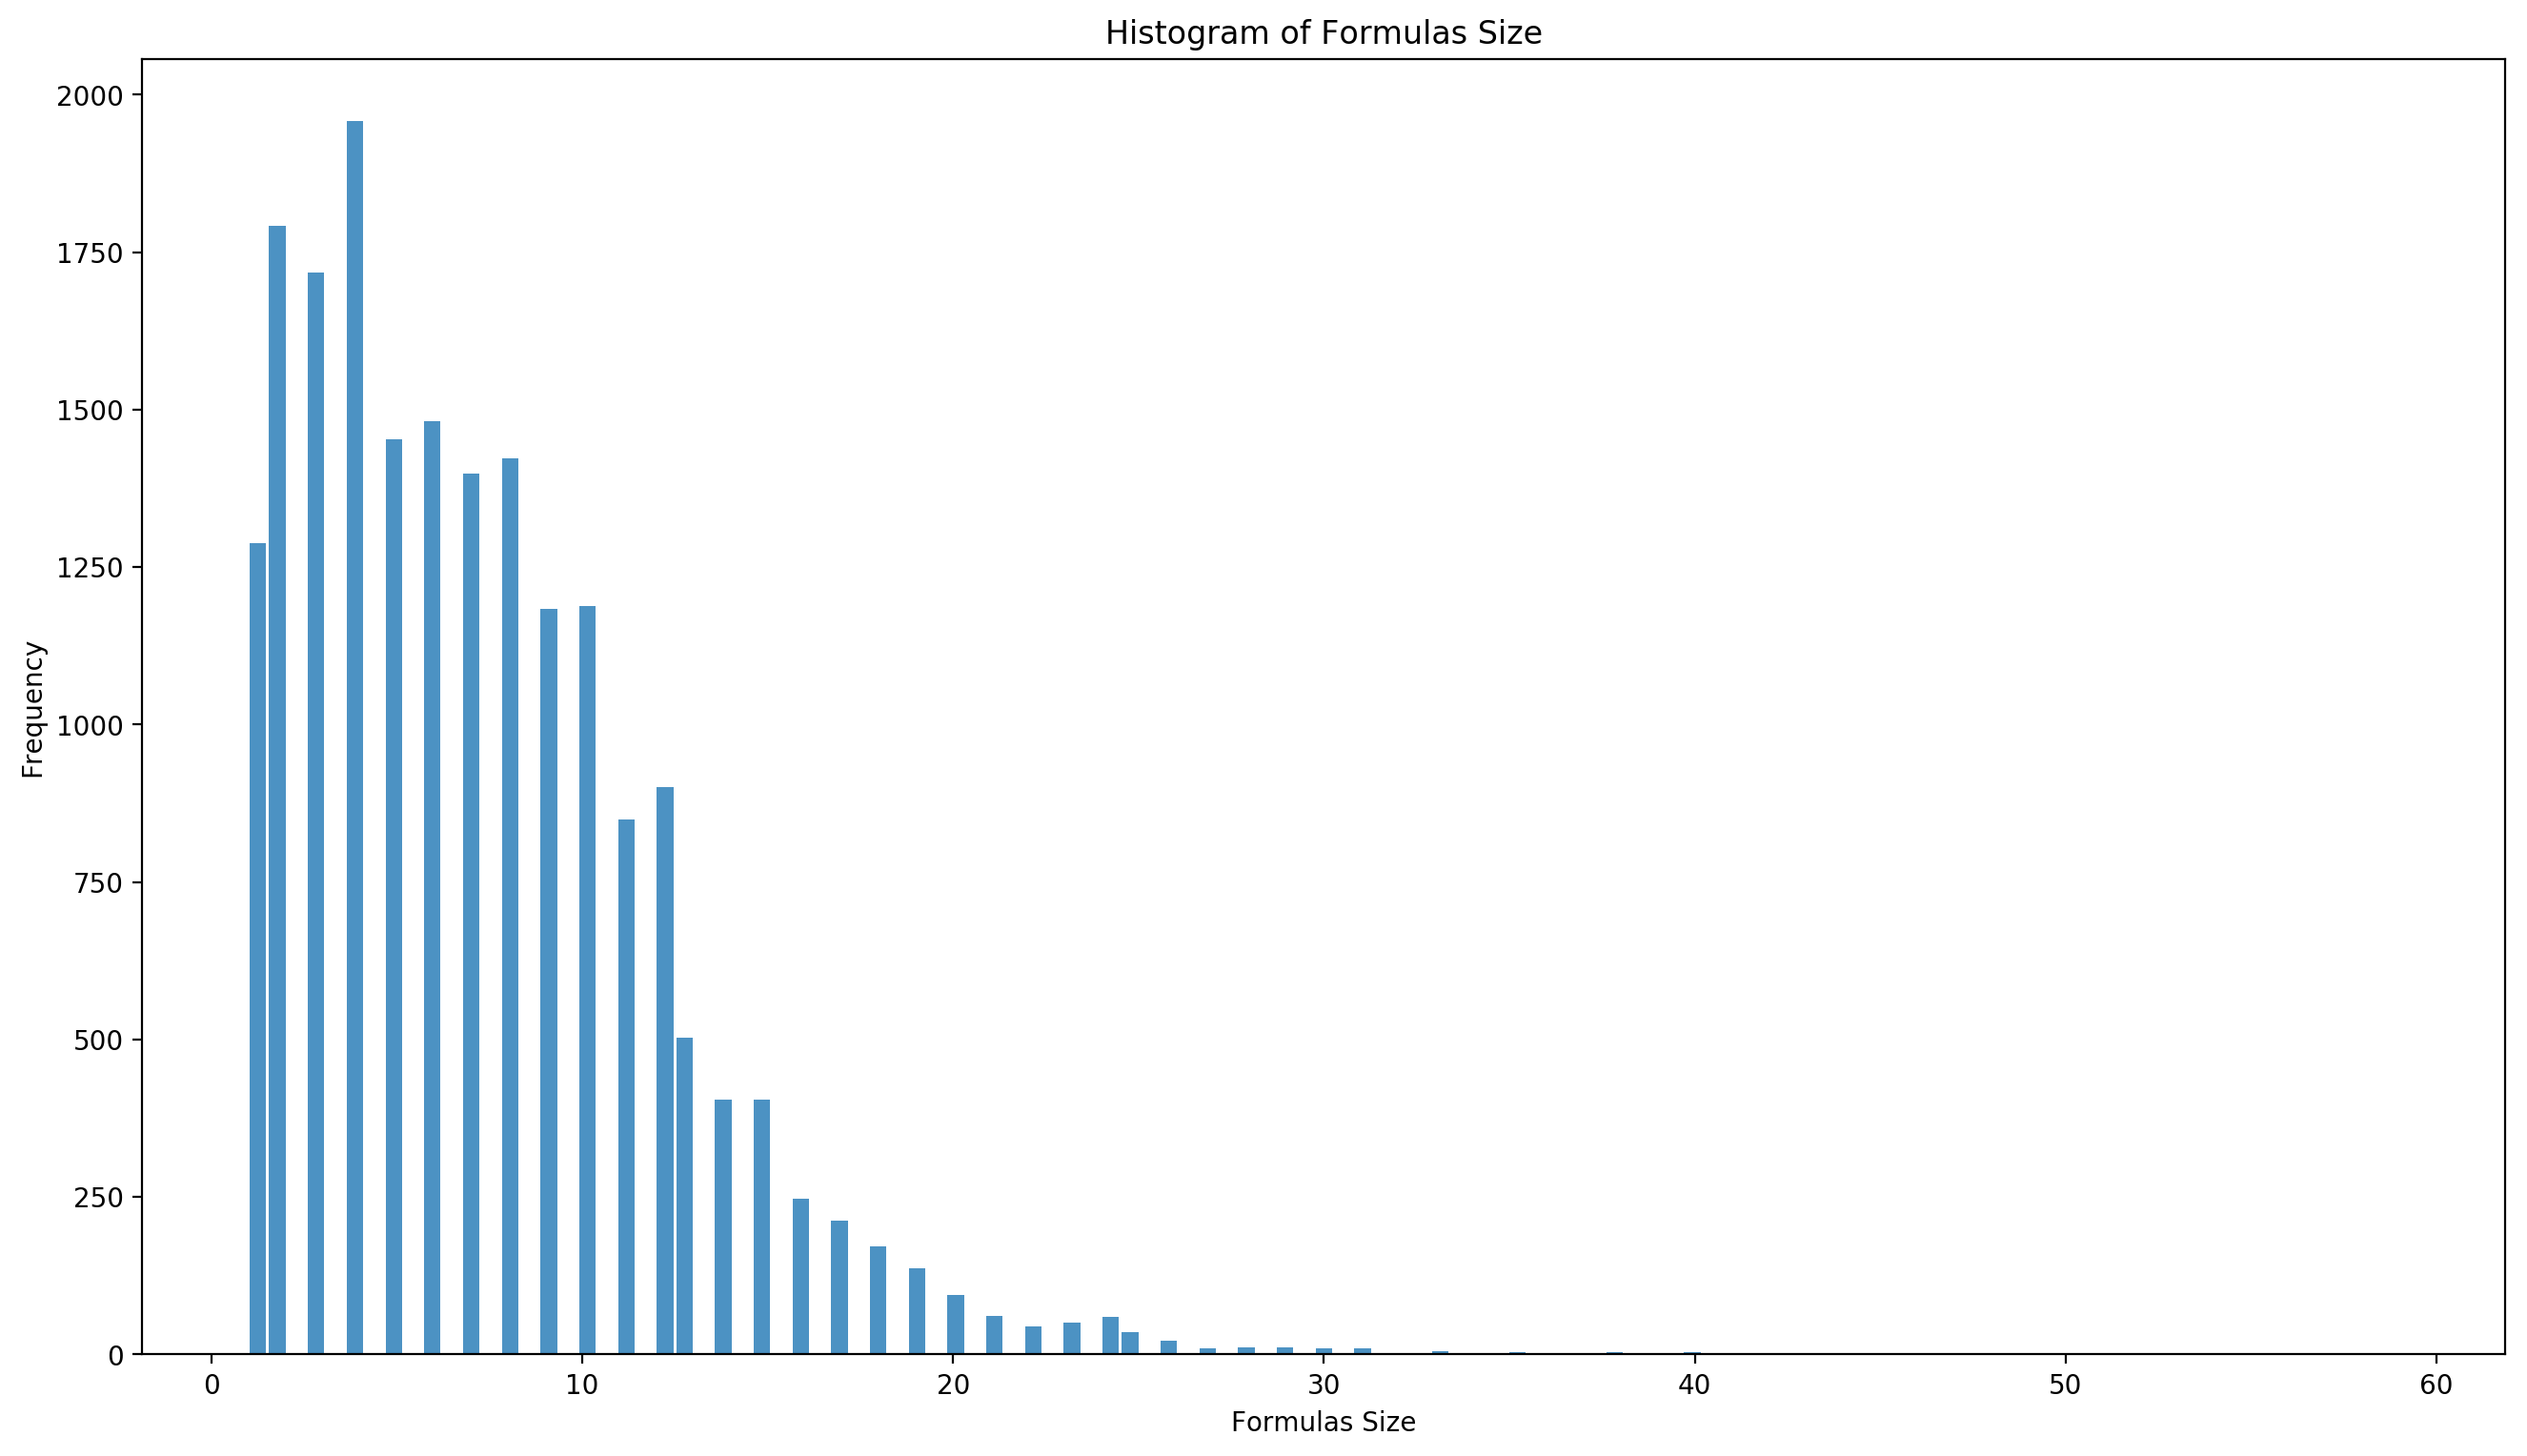

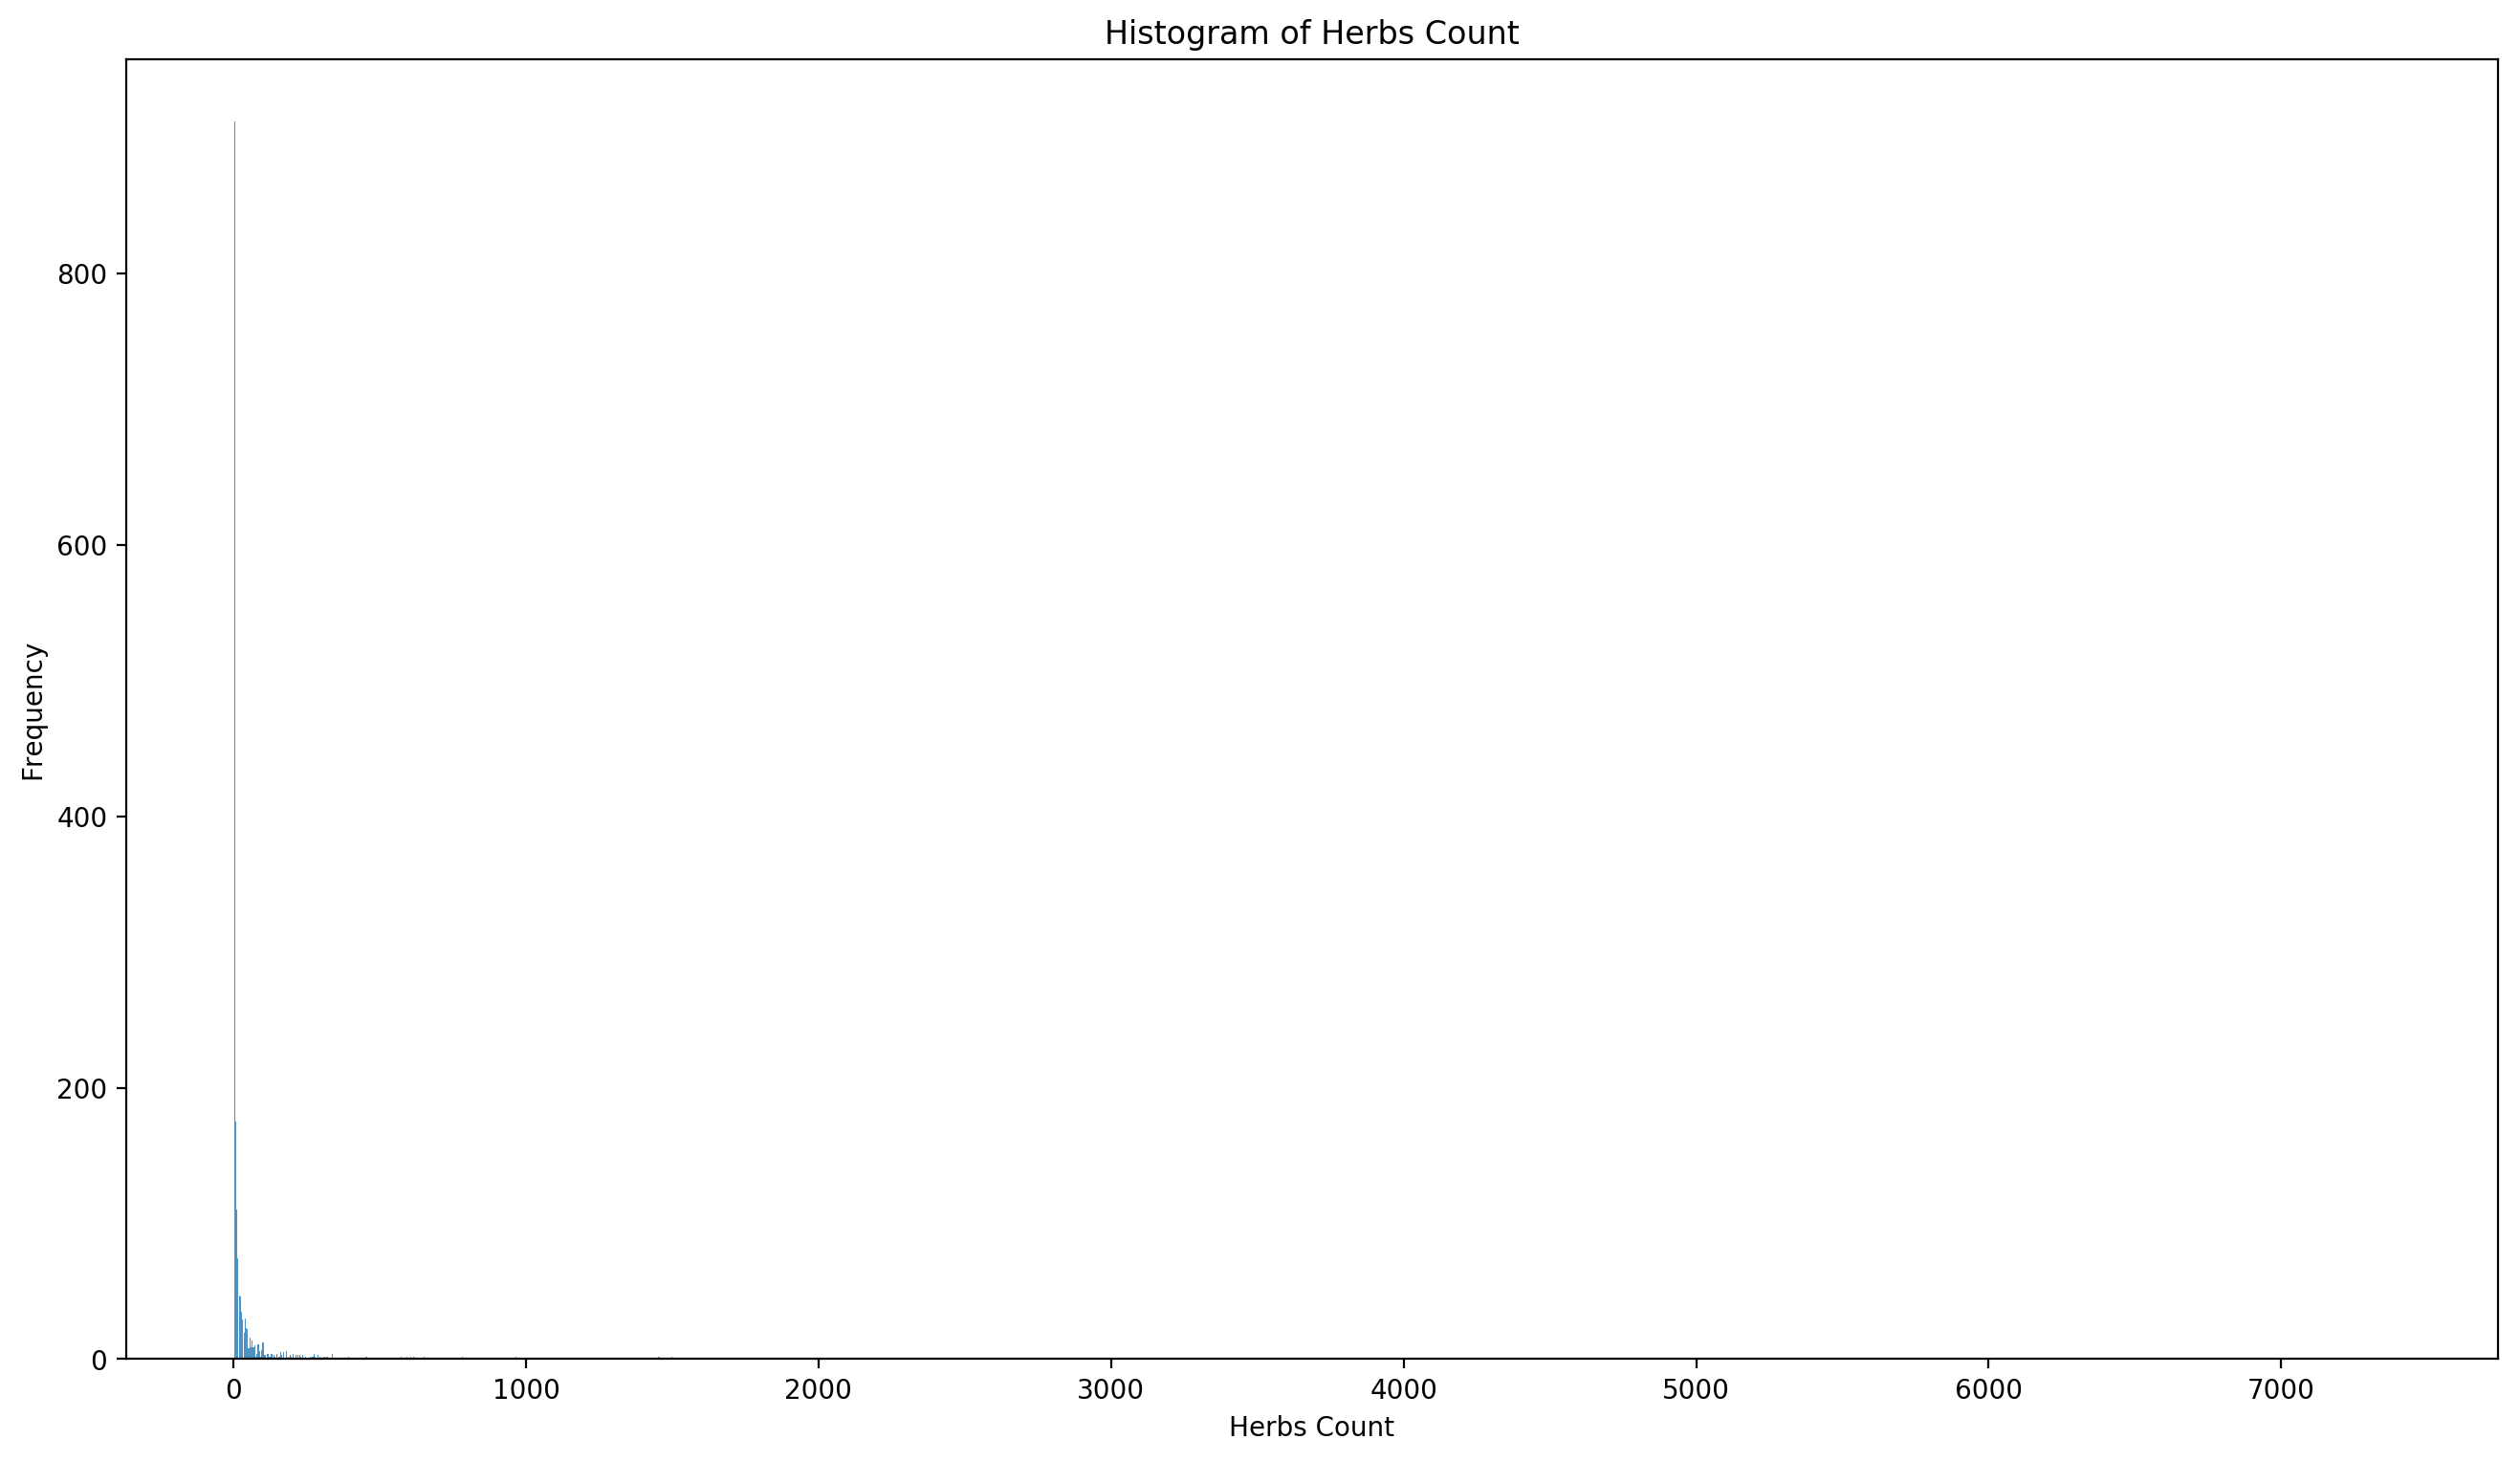

In [99]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline  

figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
freq_, bins_, _ = plt.hist( formula_size, bins='auto', alpha=0.8, rwidth=0.85 )  # arguments are passed to np.histogram
plt.title("Histogram of Formulas Size")
plt.xlabel('Formulas Size')
plt.ylabel('Frequency')
plt.show()

figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
freq_, bins_, _ = plt.hist( herb_count, bins='auto', alpha=0.8, rwidth=0.85 )  # arguments are passed to np.histogram
plt.title("Histogram of Herbs Count")
plt.xlabel('Herbs Count')
plt.ylabel('Frequency')
plt.show()

In [112]:
# 분석 대상에서 빈도가 너무 작은 본초를 제거하고 크기가 너무 작거나 큰 처방도 제외함

# 본초 : 출현빈도 6회 이상만 사용
herbs_under_6freq = [ h_ for h_, f_ in herb_with_count.items()  if f_ < 6 ] 
formula_list_ = [ [ herb for herb in line_list if herb not in herbs_under_6freq ]  for line_list in corpus_list ]
# 처방 : 2-24개 본초를 포함한 것만 사용
formula_list = [ formula for formula in formula_list_ if len( formula) > 1 and len( formula ) < 25 ]
formula_docs = [ " ".join( formula) for formula in formula_list ]

corpus_len = len( formula_list )
print( "# 최종적으로 {}가지 처방이 준비됨".format( corpus_len ) )

# 최종적으로 17528가지 처방이 준비됨


## Conter-based word embedding


### 1st order vector

* TF vector
* TF-IDF vector

In [113]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from time import time

In [114]:
# Build TF Matrix and TF-IDF Matrix

t0 = time()
tf_vectorizer = CountVectorizer( )
tf = tf_vectorizer.fit_transform( corpus )
print( "TF Matrix done in {:03f}s.".format(time() - t0) )

t0 = time()
tfidf_vectorizer = TfidfVectorizer( )
tfidf = tfidf_vectorizer.fit_transform( corpus )
print( "TF-IDF Matrix done in {:03f}s.".format(time() - t0) )

doc_size, feature_size = tf.shape
print( "# 처방 개수: ", doc_size)
print( "# 본초 개수: ", feature_size, " ({}회 이상 사용된 본초)".format( min_df ) ) 

TF Matrix done in 0.119026s.
TF-IDF Matrix done in 0.131974s.
# 처방 개수:  19162
# 본초 개수:  1802  (6회 이상 사용된 본초)


In [120]:
# Save TF and TFIDF matrix : sparse matrix이기 때문에 파일크기가 매우 크다. 
# np.savetxt("../../_data/formulas_tf.tsv", tf.toarray(), delimiter='\t', fmt="%10.3f" )
# np.savetxt("../../_data/formulas_tfidf.tsv", tfidf.toarray(), delimiter='\t', fmt="%10.3f" )

In [21]:
tf_feature_names = tf_vectorizer.get_feature_names()

term_freq = np.sum( tf, axis=0 ).flatten().tolist()[0]
doc_size = np.sum( tf, axis=1 ).flatten().tolist()[0]

### 2nd order vector 

* co-word vector
* t-score vector


##### 2.2.1. co-word vector

In [23]:
co_word = ( tf.T * tf )

co_word.shape

(243, 243)

##### 2.2.2. t-score vector

In [9]:
from scipy.sparse import lil_matrix
from tqdm import tqdm_notebook as tqdm
import math 

def t_score(o, e):
    return ( o - e ) / math.sqrt( o + 1 )


In [10]:
import pickle
from pathlib import Path

pck_path = "./data/vector_of_tscore{:03d}.pckl".format(herb_min_df)
pck_file = Path( pck_path )

if pck_file.exists():
    with open( pck_path, 'rb') as file:
        vector_of_tscore = pickle.load( file )
else:
    vector_of_tscore = lil_matrix( ( feature_size, feature_size ) )
    for i in tqdm( range(0, feature_size), desc="ROW" ):
        for j in range(0, feature_size ):
            o = vector_of_cooccurrence_sparse[i, j] 
            e = herb_freq[i][1]  * herb_freq[j][1] / doc_size
            vector_of_tscore[i, j] = t_score(o, e)

    with open( pck_path, 'wb') as f:
        print("Loading Saved Data")
        pickle.dump( vector_of_tscore, f)
        
# herb_embedding_by_tscore = vector_of_tscore.toarray()
herb_embedding_by_tscore = vector_of_tscore

### 2. 신경망 모델

* word2vec
* GloVe

In [11]:
formula_array = [ line.split() for line in corpus_list ]
corpus_array = [ list( filter( lambda it: it in feature_names, fm ) ) for fm in formula_array ]
formula_length = [ len(fm) for fm in formula_array ]
max_formula_length = max( formula_length ) 
print( "Window size: ", max_formula_length )

Window size:  59


#### word2vec

In [12]:
import gensim

vec_size = 100
pochs = 30

w2v = gensim.models.Word2Vec( corpus_array, size=vec_size, window=max_formula_length, min_count=herb_min_df, workers=10)
w2v.train( corpus_array, total_examples=len( corpus_array ), epochs=pochs)


(2612926, 4123230)

In [14]:
def w2v_most_similar( test_herb ):
    return w2v.wv.most_similar( [ test_herb ], topn=4 )

w2v_most_similar( "마황" )

[('세신', 0.39461544156074524),
 ('강활', 0.347154825925827),
 ('방풍', 0.33966684341430664),
 ('방기', 0.3191916346549988)]

#### gloVal


In [15]:
from glove import Corpus, Glove
corpus = Corpus(  ) 
corpus.fit( corpus_array, window=max_formula_length )
glove = Glove( no_components=vec_size, learning_rate=0.05 )
glove.fit( corpus.matrix, epochs=pochs, no_threads=4, verbose=True)
glove.add_dictionary( corpus.dictionary )
glove.save('./data/glove.model')


Performing 30 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29


In [16]:
def fm_chain( init_herb, most_fn ):
    output = [init_herb]
    next_herb = init_herb
    i = 0
    while i < 20:
        next_herb = most_fn( next_herb )[0][0]
        if next_herb in output:
            break
        output.append( next_herb )
        i = i + 1

    return output


print(  fm_chain( "인삼", glove.most_similar ) )


['인삼', '자감초', '작약']


### 3. 결과 비교


In [17]:
from sklearn.metrics.pairwise import cosine_similarity

class MostElem:
    
    def __init__(self, feature_list, embedding_matrix, max_n=4):
        self.feature_list = feature_list
        self.embedding_matrix = embedding_matrix
        self.max_n = max_n
    
    def most_similar( self, term ):
        i = self.feature_list.index( term )
        sims = cosine_similarity( self.embedding_matrix[i,:], self.embedding_matrix )
        most_sim_idx = sims.argsort()[0][-self.max_n-1:-1].tolist()
        most_sim_idx.reverse()
        return [ ( self.feature_list[i], sims[0][i] ) for i in most_sim_idx ] 

    def just_tscore( self, term ):
        i = self.feature_list.index( term )
        sims = self.embedding_matrix[i].toarray()
        most_sim_idx = sims.argsort()[0][-self.max_n-1:-1].tolist()
        most_sim_idx.reverse()
        return [ ( self.feature_list[i], sims[0][i] ) for i in most_sim_idx ] 

In [18]:
test_herb = "마황"
just_by_tscore = MostElem( feature_names, herb_embedding_by_tscore, max_n=4  )
# print( "just_tscore", end="\t" )
print( just_by_tscore.just_tscore( test_herb ) )
# print(  fm_chain( test_herb, just_by_tscore.just_tscore ) )

[('행인', 12.994984244905927), ('감초', 11.834130681880167), ('백지', 10.273871850669273), ('길경', 9.890428685306931)]


In [19]:
def puts_tmpl( pairs ):
    tmp = [ "{}({:0.3f})".format( *pair ) for pair in pairs ]
    return "\t".join( tmp )

def puts_results( test_herb ):
    
    print("=" * 30, " ", test_herb, " ", "=" * 30)
    
    most_embedding_by_count = MostElem( feature_names, herb_embedding_by_count, max_n=4 )
    print( "embedding_by_count", end="\t" )
    print( puts_tmpl( most_embedding_by_count.most_similar( test_herb ) ) )
    print( "* ", fm_chain( test_herb, most_embedding_by_count.most_similar ) )

    most_embedding_by_tfidf = MostElem( feature_names, herb_embedding_by_tfidf, max_n=4 )
    print( "embedding_by_tfidf", end="\t" )
    print( puts_tmpl( most_embedding_by_tfidf.most_similar( test_herb ) ) )
    print( "* ",  fm_chain( test_herb, most_embedding_by_tfidf.most_similar ) )

    most_embedding_by_coocurrence = MostElem( feature_names, herb_embedding_by_coocurrence, max_n=4 )
    print( "embedding_by_coocurrence", end="\t" )
    print( puts_tmpl( most_embedding_by_coocurrence.most_similar( test_herb ) ) )
    print( "* ",  fm_chain( test_herb, most_embedding_by_coocurrence.most_similar ) )

    most_embedding_by_tscore = MostElem( feature_names, herb_embedding_by_tscore, max_n=4  )
    print( "embedding_by_tscore", end="\t" )
    print( puts_tmpl( most_embedding_by_tscore.most_similar( test_herb ) ) )
    print( "* ",  fm_chain( test_herb, most_embedding_by_tscore.most_similar ) )

#     just_by_tscore = MostElem( feature_names, herb_embedding_by_tscore, max_n=4  )
#     print( "just_tscore", end="\t" )
#     print( puts_tmpl( just_by_tscore.just_tscore( test_herb ) ) )
#     print( "* ", fm_chain( test_herb, just_by_tscore.just_tscore ) )
    
    print( "embedding_by_word2vec", end="\t" )
    print( puts_tmpl( w2v_most_similar(  test_herb  ) )  )
    print( "* ", fm_chain( test_herb, w2v_most_similar ) )
    
    print( "embedding_by_glove", end="\t" )
    print( puts_tmpl( glove.most_similar(test_herb) )  )
    print( "* ", fm_chain( test_herb, glove.most_similar ) )
    
    print()
    



In [ ]:
import sys
sys.stdout = open("result.txt", 'w', encoding="utf-8")

# for hb in ["마황", "대황", "부자", "시호", "계지", "생강", "대조", "진피"]:
#     print(hb)
#     puts_results( hb )
    
    
# for hb in ["인삼", "백출", "복령", "감초", "숙지황", "당귀", "천궁", "작약", "육계", "황기"]:
#     puts_results( hb )

    
for hb in herb_freq_sorted[:20]:
    print(hb)
    puts_results( hb[0] )

####
# sys.stdout = sys.__stdout__
####




# print( most_similar( "인삼", feature_names, herb_embedding_by_coocurrence_svd, max_n=4 ) )
# most_similar( "인삼", feature_names, herb_embedding_by_count, max_n=4 )
# feature_names[  ]
# ind = np.argpartition( sims, -2)
# print( list( ind ) )
sys.stdout = sys.__stdout__

In [20]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [25]:
def generate_tokens_and_labels( model, word_list_with_index, model_type="dict" ):
    labels = []
    tokens = []
    
    if model_type=="dict":
        for word, index in word_list_with_index:
            tokens.append( model[word] )
            labels.append( word )
    else:
        for word, index in word_list_with_index:
            tokens.append( model[index] )
            labels.append( word )
            
    return (tokens, labels)


def tsne_model_fit_transform( tokens ):
    tsne_model = TSNE(n_components=2, n_iter=2000, init='pca', random_state=23)
    new_values = tsne_model.fit_transform( tokens )
    return new_values

def tsne_plot( new_values, labels ):
    "Creates and TSNE model and plots it"
    plt.figure( figsize=(8, 8) ) 
    for i in range( len( new_values ) ):
        plt.scatter( new_values[i][0], new_values[i][1] )
        plt.annotate(labels[i],
                     xy=( new_values[i][0], new_values[i][1] ),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    return plt


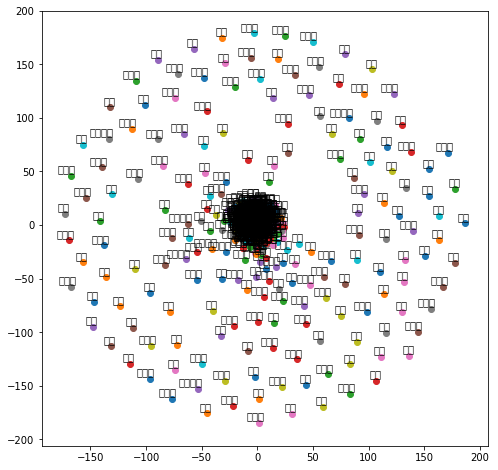

In [31]:
# plot herb_embedding_by_count
word_list_with_index = [ ( h, feature_names.index( h ) )  for h in feature_names ]
tokens, labels = generate_tokens_and_labels( herb_embedding_by_count.toarray(), word_list_with_index, model_type="list" )
new_values = tsne_model_fit_transform( tokens )
tsne_plot( new_values, labels ).show()


In [36]:
def record_points( new_values, labels, header, hd ):
    for i in range( len(labels) ):
        hd.write( "{}\t{}\t{}\t{}\n".format(  labels[i], header, new_values[i][0], new_values[i][1] ) )

hd = open("./data/scatter_points.tsv", 'w', encoding="utf-8")
record_points( new_values, labels, "TF", hd )


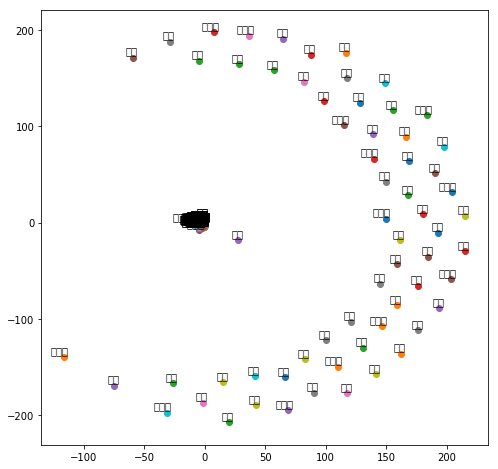

In [37]:
# plot herb_embedding_by_tfidf
word_list_with_index = [ ( h, feature_names.index( h ) )  for h in feature_names ]
tokens, labels = generate_tokens_and_labels( herb_embedding_by_tfidf.toarray(), word_list_with_index, model_type="list" )
new_values = tsne_model_fit_transform( tokens )
tsne_plot( new_values, labels ).show()

record_points( new_values, labels, "TFIDF", hd )

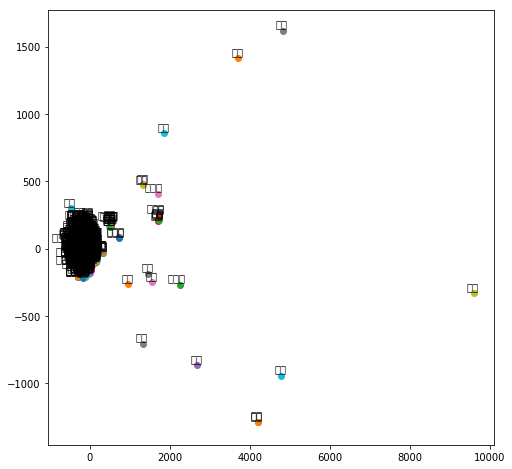

In [38]:
# plot herb_embedding_by_coocurrence
word_list_with_index = [ ( h, feature_names.index( h ) )  for h in feature_names ]
tokens, labels = generate_tokens_and_labels( herb_embedding_by_coocurrence.toarray(), word_list_with_index, model_type="list" )
new_values = tsne_model_fit_transform( tokens )
tsne_plot( new_values, labels ).show()

record_points( new_values, labels, "COWORD", hd )

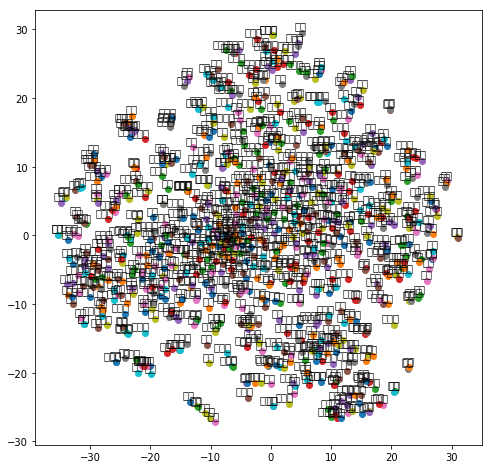

In [39]:
# plot herb_embedding_by_tscore
word_list_with_index = [ ( h, feature_names.index( h ) )  for h in feature_names ]
tokens, labels = generate_tokens_and_labels( herb_embedding_by_tscore.toarray(), word_list_with_index, model_type="list" )
new_values = tsne_model_fit_transform( tokens )
tsne_plot( new_values, labels ).show()

record_points( new_values, labels, "TSCORE", hd )

In [40]:
hd.close()

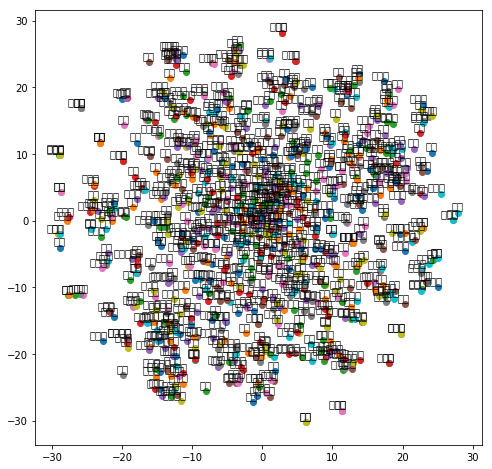

In [43]:
# plot word2vec
word_list_with_index = [ ( h, feature_names.index( h ) )  for h in feature_names ]    
tokens, labels = generate_tokens_and_labels( w2v.wv, word_list_with_index, model_type="dict" )
new_values = tsne_model_fit_transform( tokens )
tsne_plot( new_values, labels ).show()

hd2 = open("./data/scatter_points2.tsv", 'w', encoding="utf-8")
record_points( new_values, labels, "W2V", hd2 )

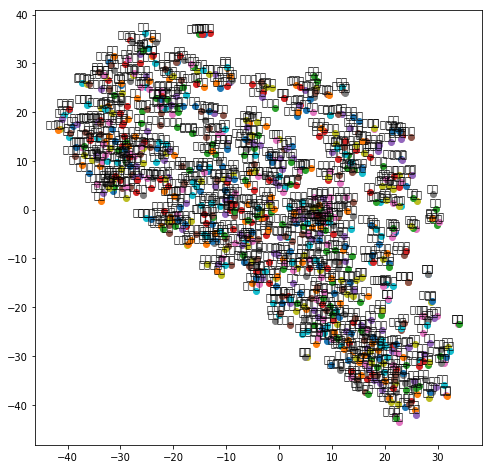

In [44]:
# plot glove
word_list_with_index = [ ( h, glove.dictionary[ h ] ) for h in feature_names ]
tokens, labels = generate_tokens_and_labels( glove.word_vectors, word_list_with_index, model_type="list" )
new_values = tsne_model_fit_transform( tokens )
tsne_plot( new_values, labels ).show()

record_points( new_values, labels, "GLOVE", hd2 )

In [ ]:
hd2.close()

In [ ]:
dir(glove)
# glove.word_vectors
i = glove.dictionary["마황"]
glove.word_vectors[i]

## 결론
